In [9]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('PRSA_data.csv')
data = data.dropna()
data = data.reset_index(drop=True)
# 目前只放入有效信息
morning_data = []
afternoon_data = []
evening_data = []
night_data = []

In [11]:
now_block_day = data.loc[0,'day']
print(type(now_block_day))

<class 'numpy.int64'>


In [12]:
now_block_day_arr = data.loc[0,['year','month','day']]
# now_block_day str形式
# param pd.dataframe column: year month day
# return now_date str
def get_now_date(now_date_arr):
    now_date_str = ""
    for index, item in enumerate(now_date_arr):
        if index != len(now_block_day_arr)-1:
            now_date_str += str(item) + "-"
        else:
            now_date_str += str(item)

    return now_date_str

def get_now_time_interval(now_hour):
    if 5 <= now_hour < 10:
        return "morning"
    elif 10 <= now_hour < 15:
        return "afternoon"
    elif 15 <= now_hour < 20:
        return  "evening"
    elif 20 <= now_hour <= 23 or 0 <= now_hour < 5:
        return "night"

In [13]:
now_block_date_arr = data.loc[0,['year','month','day']]
now_block_date_str = get_now_date(now_block_day_arr)
current_day = now_block_day
now_morning_data = [0,0]  # left average pm2.5 right total_hour
now_afternoon_data = [0,0]
now_evening_data = [0,0]
now_night_data = [0,0]
# 年月日都考虑
for item in data.loc[:,['year','month','day','hour','pm2.5']].values:
    current_date_arr = item[:3].astype(int)
    current_date_str = get_now_date(current_date_arr)

    current_hour = int(item[3])

    current_pm25 = item[4]

    current_time_interval  = get_now_time_interval(current_hour)

    if current_date_str == now_block_date_str:

        if current_time_interval == "morning":
            now_morning_data[0] += current_pm25
            now_morning_data[1] += 1

        elif current_time_interval == "afternoon":
            now_afternoon_data[0] += current_pm25
            now_afternoon_data[1] += 1

        elif current_time_interval == "evening":
            now_evening_data[0] += current_pm25
            now_evening_data[1] += 1

        elif current_time_interval == "night":
            now_night_data[0] += current_pm25
            now_night_data[1] += 1
    else:
        if now_morning_data[0] != 0:
            now_morning_data[0] = now_morning_data[0]/now_morning_data[1]
            morning_data.append(now_morning_data[0]) # average pm2.5
        if now_afternoon_data[0] != 0:
            now_afternoon_data[0] = now_afternoon_data[0]/now_afternoon_data[1]
            afternoon_data.append(now_afternoon_data[0]) # average pm2.5
        if now_evening_data[0] != 0:
            now_evening_data[0] = now_evening_data[0]/now_evening_data[1]
            evening_data.append(now_evening_data[0]) # average pm2.5
        if now_night_data[0] != 0:
            now_night_data[0] = now_night_data[0]/now_night_data[1]
            night_data.append(now_night_data[0]) # average pm2.5

        now_morning_data = [0,0]  # left average pm2.5 right total_hour
        now_afternoon_data = [0,0]
        now_evening_data = [0,0]
        now_night_data = [0,0]

        now_block_date_str = current_date_str

# 最后一项可能不为空
if now_morning_data[0] != 0:
    now_morning_data[0] = now_morning_data[0]/now_morning_data[1]
    morning_data.append(now_morning_data[0]) # average pm2.5
if now_afternoon_data[0] != 0:
    now_afternoon_data[0] = now_afternoon_data[0]/now_afternoon_data[1]
    afternoon_data.append(now_afternoon_data[0]) # average pm2.5
if now_evening_data[0] != 0:
    now_evening_data[0] = now_evening_data[0]/now_evening_data[1]
    evening_data.append(now_evening_data[0]) # average pm2.5
if now_night_data[0] != 0:
    now_night_data[0] = now_night_data[0]/now_night_data[1]
    night_data.append(now_night_data[0]) # average pm2.5


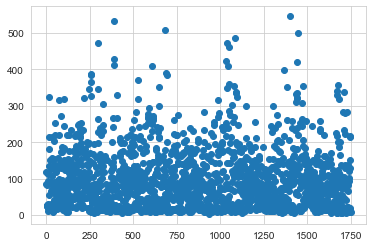

In [14]:
import numpy as np
import matplotlib.pyplot as plt
x = range(len(morning_data))
y = morning_data



# 绘制柱形图
plt.scatter(x, y)

plt.show()

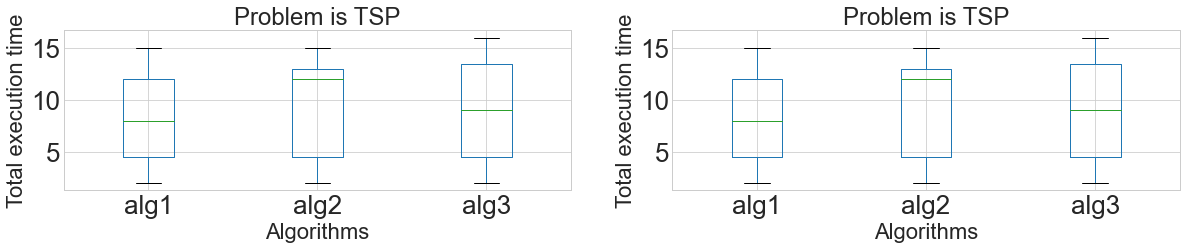

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
palette = pyplot.get_cmap('Set1')
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 18,
}

fig=plt.figure(figsize=(20,10))
iters=list(range(7))
alldata1=[]#所有纵坐标数据
data=np.array([2,4,5,8,11,13,15])#单个数据
alldata1.append(data)
data=np.array([2,3,6,12,13,13,15])
alldata1.append(data)
data=np.array([2,2,7,9,13,14,16])
alldata1.append(data)
alldata1=np.array(alldata1)
allg=["alg1","alg2","alg3"]
for i in range(2):
    db=[]
    ax=fig.add_subplot(3,2,i+1)

    db=alldata1
    df=pd.DataFrame(db.T,columns=allg)
    df.boxplot(ax=ax,fontsize=26)
    ax.set_title("Problem is TSP",fontsize=24)
    ax.set_xlabel('Algorithms',fontsize=22)
    ax.set_ylabel('Total execution time',fontsize=22)


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

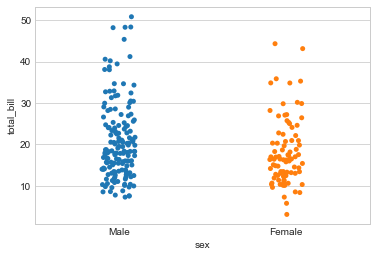

In [16]:
import seaborn as sns
tips = sns.load_dataset("tips")
sns.stripplot(x='sex' , y='total_bill', data=tips)

In [17]:
from pandas.core.frame import DataFrame


pm25_data = []
pm25_data.extend(morning_data)
pm25_data.extend(afternoon_data)
pm25_data.extend(evening_data)
pm25_data.extend(night_data)

morning_arr   = ["morning" for i in range(len(morning_data))]
afternoon_arr = ["afternoon" for i in range(len(afternoon_data))]
evening_arr = ["evening" for i in range(len(evening_data))]
night_arr = ["night" for i in range(len(night_data))]
time_interval = []
time_interval.extend(morning_arr)
time_interval.extend(afternoon_arr)
time_interval.extend(evening_arr)
time_interval.extend(night_arr)

temp_dict = {"time_interval":time_interval,
             "pm2.5":pm25_data
             }

temp_df = DataFrame(temp_dict)


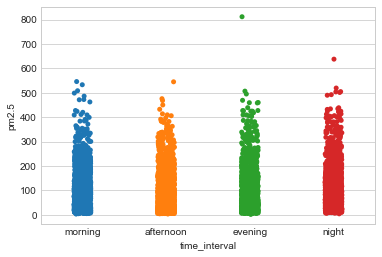

In [18]:
import seaborn as sns
fig = sns.stripplot(x='time_interval' , y='pm2.5', data=temp_df)
fig_get = fig.get_figure()
fig_get.savefig("report_images/feature1_pm25_day.png",dpi=600,bbox_inches="tight")
# sns.savefig("test.pdf")

In [162]:
# 根据季节计算pm2.5的值的分布


In [20]:
import pandas as pd
data = pd.read_csv('PRSA_data.csv')
data = data.dropna()
data = data.reset_index(drop=True)

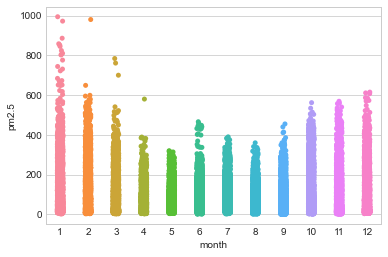

In [21]:
import seaborn as sns
fig = sns.stripplot(x='month' , y='pm2.5', data=data)
fig_get = fig.get_figure()
fig_get.savefig("report_images/feature1_pm25_season.png",dpi=600,bbox_inches="tight")